## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# делаем визуальную настройку графиков
sns.set_palette("Set2") 
sns.set_theme(style="dark")

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [3]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [4]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Посмотрим на разброс поездок по датам:
print(f'Самая первая поездка из датасета была совершена {taxi_data["pickup_datetime"].dt.date.min()}')
print(f'Крайняя поездка из датасета была совершена {taxi_data["pickup_datetime"].dt.date.max()}')

Самая первая поездка из датасета была совершена 2016-01-01
Крайняя поездка из датасета была совершена 2016-06-30


*Как мы видим - разброс поездок по дате составляет всего полгода*

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [5]:
taxi_data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

*Видим, что пропусков в данных нет, то есть одной проблемой стало меньше.*

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [6]:
# Выведем ответы на поставленные вопросы:
print(f'a) Количество уникальных таксопарков в датасете - {taxi_data["vendor_id"].nunique()}')
print(f'б) Максимальное количество пассажиров - {taxi_data["passenger_count"].max()}')
print(f'в) Средняя длительность поездки в секундах составляет {taxi_data["trip_duration"].mean().round()},')
print(f'   в то время как медианная -  {taxi_data["trip_duration"].median().round()}')
print(f'г) Минимальное время поездки равно {taxi_data["trip_duration"].min().round()} секунд')
print(f'   а максимальное -  {taxi_data["trip_duration"].max().round()} секунд')

a) Количество уникальных таксопарков в датасете - 2
б) Максимальное количество пассажиров - 9
в) Средняя длительность поездки в секундах составляет 959.0,
   в то время как медианная -  662.0
г) Минимальное время поездки равно 1 секунд
   а максимальное -  3526282 секунд


*Минимальная и максимальная длительности поездки вероятнее всего являются выбросами в данных: едва ли поезда на такси может составлять более 40 дней, а 1 секунда - это знак того, что поезда не состоялась. Так же можем наблюдать, что среднее значение длительности поездки даже приблизительно не равно медианной: по всей видимости признак не рапределен нормально.*

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [7]:
# Добавим функцию для создания дополнительных признаков.
# Она нам пригодится, когда мы будем работать с тестовым набором данных
 
def add_datetime_features(df):
    
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    
    return df

taxi_data = add_datetime_features(taxi_data)

In [8]:
# Создадим пару перенных, чтобы не загромождать код
satuday_trip_count = taxi_data.query("pickup_day_of_week == 5")['id'].count()
mean_trip_count = round(taxi_data['id'].nunique() / taxi_data['pickup_date'].nunique())

print(f"а) По субботам было совершено {satuday_trip_count} поездок")
print(f"б) В среднем в день совершается {mean_trip_count} поездок")

а) По субботам было совершено 220868 поездок
б) В среднем в день совершается 8015 поездок


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [9]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')
holiday_data

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day
5,Monday,2016-05-30,Memorial Day
6,Sunday,2016-06-19,Father's Day
7,Monday,2016-07-04,Independence Day
8,Monday,2016-09-05,Labor Day
9,Monday,2016-10-10,Columbus Day


In [10]:
def add_holiday_features(taxi_data, holiday_data):
    """
    Добавляем в taxi_data признак pickup_holiday, показывающий, 
    относится ли дата поездки к празднику.

    Args:
        taxi_data (pd.DataFrame): таблица с данными о поездках
        holiday_data (pd.DataFrame): таблица с праздничными датами и информацией о праздниках

    Returns:
        pd.DataFrame: исходный taxi_data с добавленным столбцом pickup_holiday (1 или 0)
    """
    # Получаем список праздничных дат в виде строк
    holiday_list = holiday_data['date'].tolist()

    # Создаем новый столбец pickup_holiday:
    taxi_data['pickup_holiday'] = taxi_data['pickup_date'].map(
        lambda x: 1 if str(x) in holiday_list else 0
    )

    return taxi_data


# Добавляем признак праздника в данные поездок
taxi_data = add_holiday_features(taxi_data, holiday_data)

# Вычисляем медиану длительности поездки в праздничные дни
median_duration = taxi_data.query('pickup_holiday == 1')['trip_duration'].median()
print(f'Медианная длительность поездки на такси в праздничные дни равна {median_duration}')


Медианная длительность поездки на такси в праздничные дни равна 585.0


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [11]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')
osrm_data.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [12]:
def add_osrm_features(taxi_data, osrm_data):
    """
    Обогащаем данные taxi_data информацией из osrm_data.

    Добавляем колонки:
    - total_distance
    - total_travel_time
    - number_of_steps
    на основе общего идентификатора 'id'.
    """
    # Выбираем из osrm_data только нужные столбцы
    temp_data = osrm_data[[
        'id',
        'total_distance',
        'total_travel_time',
        'number_of_steps'
    ]]

    # Объединяем таблицы по столбцу 'id'
    merged = taxi_data.merge(
        temp_data,
        left_on='id',
        right_on='id',
        how='left'
    )

    return merged


# Добавляем данные OSRM к taxi_data
taxi_data = add_osrm_features(taxi_data, osrm_data)

# Вычисляем разницу между медианой длительности поездок по исходным данным и OSRM
median_difference = taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()
print(f'Разница между медианной длительностью поездки в данных и медианной длительностью поездки, '
      f'полученной из OSRM равна {median_difference:.0f} секунд')

# Проверяем наличие пропущенных значений в данных после объединения
missing_values = taxi_data.isna().sum()
print("Количество пропусков в каждом столбце:\n", missing_values)


Разница между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM равна 372 секунд
Количество пропусков в каждом столбце:
 id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_hour           0
pickup_day_of_week    0
pickup_holiday        0
total_distance        1
total_travel_time     1
number_of_steps       1
dtype: int64


*У нас появился пропуск в данных из-за того, что для этой поездки не удалось выгрузить данные из веб-источника OSRM API.*

Посчитаем расстояние по формуле гаверсинуса (в километрах):
$$
h(x_1, x_2) = 2 R \arcsin \left( 
\sqrt{
\sin^2\left(\frac{\varphi_2 - \varphi_1}{2}\right) + \cos(\varphi_1) \cos(\varphi_2) \sin^2\left(\frac{\lambda_2 - \lambda_1}{2}\right)
}
\right)
$$

где *R* — радиус земли (6371 км), *h*  — расстояние между двумя точками на сфере (в километрах).

Также вычислим направление движения автомобиля (угол пеленга) по формуле:

$$
\alpha = a \cdot r \cdot c \cdot t \cdot g \left(
\frac{
\sin i n \left( \frac{\varphi_2 - \varphi_1}{2} \right) \cdot c o s(\varphi_1) \cdot s i n \left( \frac{\lambda_2 - \lambda_1}{2} \right)
}{
\sin s i n \left( \frac{\varphi_2 - \varphi_1}{2} \right) \cdot c o s (\varphi_1) \cdot s i n \left( \frac{\lambda_2 - \lambda_1}{2} \right)
} - \ldots
\right)
$$

где $\alpha$ — угол направления движения от первой точки ко второй (может измеряться как в радианах, так и в градусах).

In [13]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    """
    Рассчитывает кратчайшее расстояние по поверхности Земли
    между двумя точками (широта, долгота) с использованием формулы Хаверсина.

    Args:
        lat1 (float or array-like): широта первой точки в градусах
        lng1 (float or array-like): долгота первой точки в градусах
        lat2 (float or array-like): широта второй точки в градусах
        lng2 (float or array-like): долгота второй точки в градусах

    Returns:
        float or np.ndarray: расстояние в километрах
    """
    # Переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))

    EARTH_RADIUS = 6371  # Радиус Земли в километрах

    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1

    # Формула Хаверсина
    d = (
        np.sin(lat_delta * 0.5) ** 2
        + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    )
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))

    return h


def get_angle_direction(lat1, lng1, lat2, lng2):
    """
    Рассчитывает угол направления движения от первой точки ко второй
    в градусах (азимут), используя формулу пеленга.

    Args:
        lat1 (float or array-like): широта первой точки в градусах
        lng1 (float or array-like): долгота первой точки в градусах
        lat2 (float or array-like): широта второй точки в градусах
        lng2 (float or array-like): долгота второй точки в градусах

    Returns:
        float or np.ndarray: угол направления в градусах
    """
    # Переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))

    lng_delta_rad = lng2 - lng1

    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = (
        np.cos(lat1) * np.sin(lat2)
        - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    )

    alpha = np.degrees(np.arctan2(y, x))

    return alpha


### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [14]:
def add_geographical_features(taxi_data):
    """
    Добавляет географические признаки в DataFrame taxi_data:
    - haversine_distance — расстояние по формуле Хаверсина между точками посадки и высадки;
    - direction — угол направления движения от точки посадки к точке высадки.

    Args:
        taxi_data (pd.DataFrame): входной датафрейм с колонками
            'pickup_latitude', 'pickup_longitude',
            'dropoff_latitude', 'dropoff_longitude'

    Returns:
        pd.DataFrame: исходный датафрейм с добавленными столбцами
    """

    # Применяем функцию get_haversine_distance по каждой строке датафрейма
    # axis=1 означает, что передаём строку целиком в лямбда-функцию
    taxi_data['haversine_distance'] = taxi_data.apply(
        lambda row: get_haversine_distance(
            row['pickup_latitude'],
            row['pickup_longitude'],
            row['dropoff_latitude'],
            row['dropoff_longitude']
        ),
        axis=1
    )

    # Аналогично применяем функцию get_angle_direction для направления движения
    taxi_data['direction'] = taxi_data.apply(
        lambda row: get_angle_direction(
            row['pickup_latitude'],
            row['pickup_longitude'],
            row['dropoff_latitude'],
            row['dropoff_longitude']
        ),
        axis=1
    )

    return taxi_data

taxi_data = add_geographical_features(taxi_data)
haversine = taxi_data['haversine_distance'].median()

print(f'Медианное расстояние Хаверсина всех поездок равно {haversine} километров')


Медианное расстояние Хаверсина всех поездок равно 2.0937171329263693 километров


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [15]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

c:\Users\Roman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [16]:
def add_cluster_features(taxi_data, kmeans):
    """
    Добавляет признак кластера географического положения в DataFrame taxi_data с помощью модели kmeans.

    Args:
        taxi_data (pd.DataFrame): датафрейм с данными поездок, содержащий столбцы:
            'pickup_latitude', 'pickup_longitude',
            'dropoff_latitude', 'dropoff_longitude'
        kmeans: обученная модель KMeans с методом predict для кластеризации координат.

    Returns:
        pd.DataFrame: исходный датафрейм с добавленным столбцом 'geo_cluster' — номером кластера.
    """
    # Объединяем координаты точек посадки и высадки в один массив (горизонтальная конкатенация)
    coords = np.hstack((
        taxi_data[['pickup_latitude', 'pickup_longitude']],
        taxi_data[['dropoff_latitude', 'dropoff_longitude']]
    ))

    # Прогнозируем индекс кластера для каждой пары координат с помощью модели kmeans
    taxi_data['geo_cluster'] = kmeans.predict(coords)

    return taxi_data


# Добавляем кластеры к данным taxi_data
add_cluster_features(taxi_data, kmeans)

# Считаем количество объектов в каждом кластере
taxi_data['geo_cluster'].value_counts()


geo_cluster
0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: count, dtype: int64

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [17]:
weather_data = pd.read_csv('data/weather_data.csv')
weather_data.head()

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,NaN,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,NaN,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,NaN,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,NaN,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,NaN,Overcast,2015-12-31,6


In [18]:
def add_weather_features(taxi_data, weather_data):
    """
    Добавляет погодные признаки из weather_data в taxi_data по дате и часу.

    Args:
        taxi_data (pd.DataFrame): данные поездок с колонками 'pickup_date' и 'pickup_hour'
        weather_data (pd.DataFrame): данные погоды с нужными столбцами, включая 'date' и 'hour'

    Returns:
        pd.DataFrame: taxi_data с добавленными колонками из weather_data
    """

    # Выбираем из weather_data столбцы, нужные для объединения и признаков
    cols = ['temperature', 'visibility', 'wind speed', 'precip', 'events', 'date', 'hour']
    weather_cutted = weather_data[cols].copy()  # Создаём копию, чтобы избежать предупреждений SettingWithCopyWarning

    # Приводим данные столбцов с датами к типу datetime для корректного объединения
    taxi_data['pickup_date'] = pd.to_datetime(taxi_data['pickup_date'])
    weather_cutted['date'] = pd.to_datetime(weather_cutted['date'])

    # Приводим столбцы часов к целочисленному типу для точного совпадения ключей
    taxi_data['pickup_hour'] = taxi_data['pickup_hour'].astype(int)
    weather_cutted['hour'] = weather_cutted['hour'].astype(int)

    # Выполняем объединение (левый join) по дате и часу поездки
    merged = taxi_data.merge(
        weather_cutted,
        how='left',
        left_on=['pickup_date', 'pickup_hour'],
        right_on=['date', 'hour']
    )

    # Удаляем колонки 'date' и 'hour' из weather_data после объединения
    return merged.drop(['date', 'hour'], axis=1)


# Применяем функцию для добавления погодных признаков к данным taxi_data
taxi_data = add_weather_features(taxi_data, weather_data)


In [19]:
snow_trip = taxi_data['events'].value_counts()['Snow']
percent = 100 * taxi_data['temperature'].isna().sum() / taxi_data.shape[0]

print(f'а) В  снежную погоду было совершено {snow_trip} поездок')
print(f'б) После добавления данных с погодными условиями в датасете образовалось {percent:.2f} процентов пропусков')


а) В  снежную погоду было совершено 13126 поездок
б) После добавления данных с погодными условиями в датасете образовалось 0.82 процентов пропусков


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [20]:
def fill_null_weather_data(taxi_data):
    """
    Заполняет пропущенные значения в столбцах с погодными данными и поездками.

    Для столбца 'events':
        - Заполняет пропуски строкой 'None', означающей отсутствие события.

    Для числовых столбцов с погодой ['temperature', 'visibility', 'wind speed', 'precip']:
        - Заполняет пропуски медианным значением по каждой дате 'pickup_date'.

    Для столбцов с OSRM ['total_distance', 'total_travel_time', 'number_of_steps']:
        - Заполняет пропуски общей медианой по всему столбцу.

    Args:
        taxi_data (pd.DataFrame): DataFrame с данными о поездках и погоде.

    Returns:
        pd.DataFrame: DataFrame с заполненными пропущенными значениями.
    """

    # Заполняем пропуски в 'events' строкой 'None'
    taxi_data['events'].fillna('None', inplace=True)

    # Заполняем пропуски в погодных числовых столбцах медианой по дате
    for col in ['temperature', 'visibility', 'wind speed', 'precip']:
        taxi_data[col].fillna(
            taxi_data.groupby('pickup_date')[col].transform('median'),
            inplace=True
        )

    # Заполняем пропуски в столбцах с данными OSRM общей медианой по столбцу
    for col in ['total_distance', 'total_travel_time', 'number_of_steps']:
        taxi_data[col].fillna(
            taxi_data[col].median(),
            inplace=True
        )

    return taxi_data


# Заполняем пропуски в данных taxi_data
taxi_data = fill_null_weather_data(taxi_data)

# Вычисляем медиану температуры после заполнения пропусков
median_temp = taxi_data['temperature'].median()

print(f'Медиана в столбце temperature после заполнения пропусков получилась {median_temp}')


Медиана в столбце temperature после заполнения пропусков получилась 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


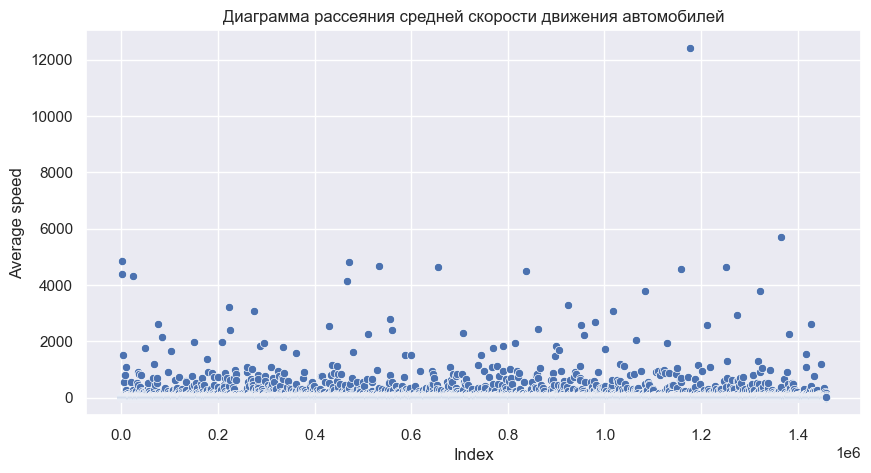

In [21]:
# Вычисляем среднюю скорость в км/ч
# total_distance - в километрах, trip_duration - в секундах, умножаем на 3.6 для перевода в км/ч
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6

# Создаем фигуру и ось для графика с заданным размером
fig, ax = plt.subplots(figsize=(10, 5))

# Строим график рассеяния: по оси X - индекс строк, по оси Y - средняя скорость
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)

# Подпись осей
ax.set_xlabel('Index')
ax.set_ylabel('Average speed')
ax.set_title('Диаграмма рассеяния средней скорости движения автомобилей')
ax.grid();


Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [22]:
# Создаем вспомогательные стоблцы
taxi_data['travel_time_hour'] = taxi_data['trip_duration'].apply(lambda x: x / 3600)
taxi_data['avg_speed'] = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6

# Считаем количество выбросов
hours24_trip = taxi_data.query('travel_time_hour >= 24').shape[0]
high_speed = taxi_data.query('avg_speed >= 300').shape[0]

print(f'а) Поездок длительностью более 24х часов - {hours24_trip}')
print(f'б) Число поездок, средняя скорость которых по кратчайшему пути превышает 300 км/ч равно {high_speed}')


а) Поездок длительностью более 24х часов - 4
б) Число поездок, средняя скорость которых по кратчайшему пути превышает 300 км/ч равно 407


In [23]:
# Удалим выбросы и вспомогательные стоблцы
data_cleaned = taxi_data.query('travel_time_hour < 24 & avg_speed < 300').copy()
data_cleaned.drop(['travel_time_hour', 'avg_speed'], inplace=True, axis=1)

data_cleaned.to_csv('data/cleaned.csv')

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [24]:
data = pd.read_csv('data/cleaned.csv', index_col=0)
data = fill_null_weather_data(data)

data['trip_duration_log'] = np.log(data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

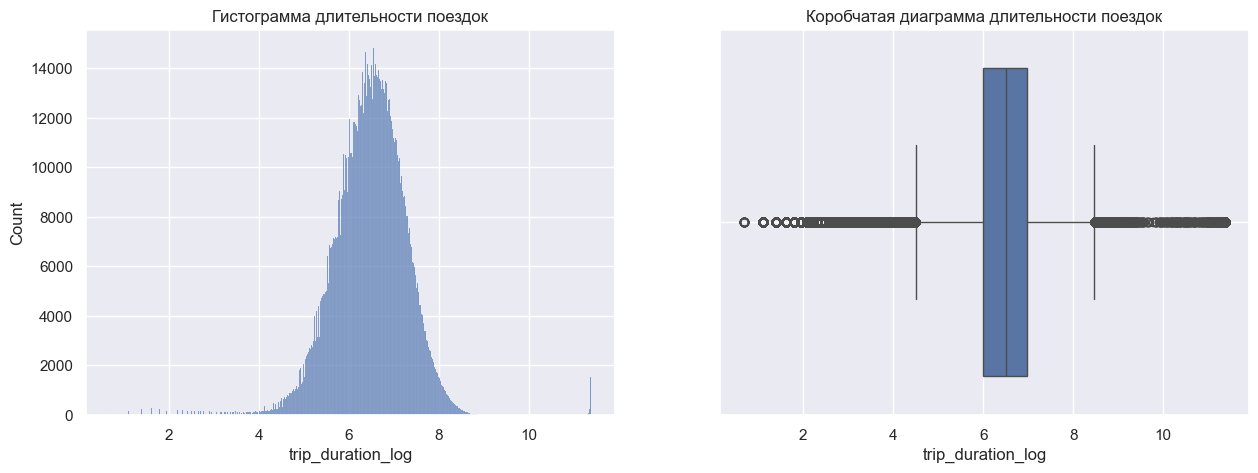

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма длительности поездок
sns.histplot(data['trip_duration_log'], ax=ax[0])
ax[0].grid()
ax[0].set_title('Гистограмма длительности поездок')

# Горизонтальная коробчатая диаграмма
sns.boxplot(data['trip_duration_log'], orient='h', ax=ax[1])
ax[1].set_title('Коробчатая диаграмма длительности поездок')
ax[1].grid()


*После логаримфирования распределение признака стало похожим на нормальное. Посмотрим, что скажет тест Д’Агостино-Пирсона (scipy.stats.normaltest):*

In [26]:
# Зададим уровень значимости
alpha = 0.05

result = stats.normaltest(data['trip_duration_log'])
p = result[1]

print('p-value = {:.2f}'.format(p))
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha}. Распределение отлично от нормального')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha}. Распределение является нормальным')

p-value = 0.00
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

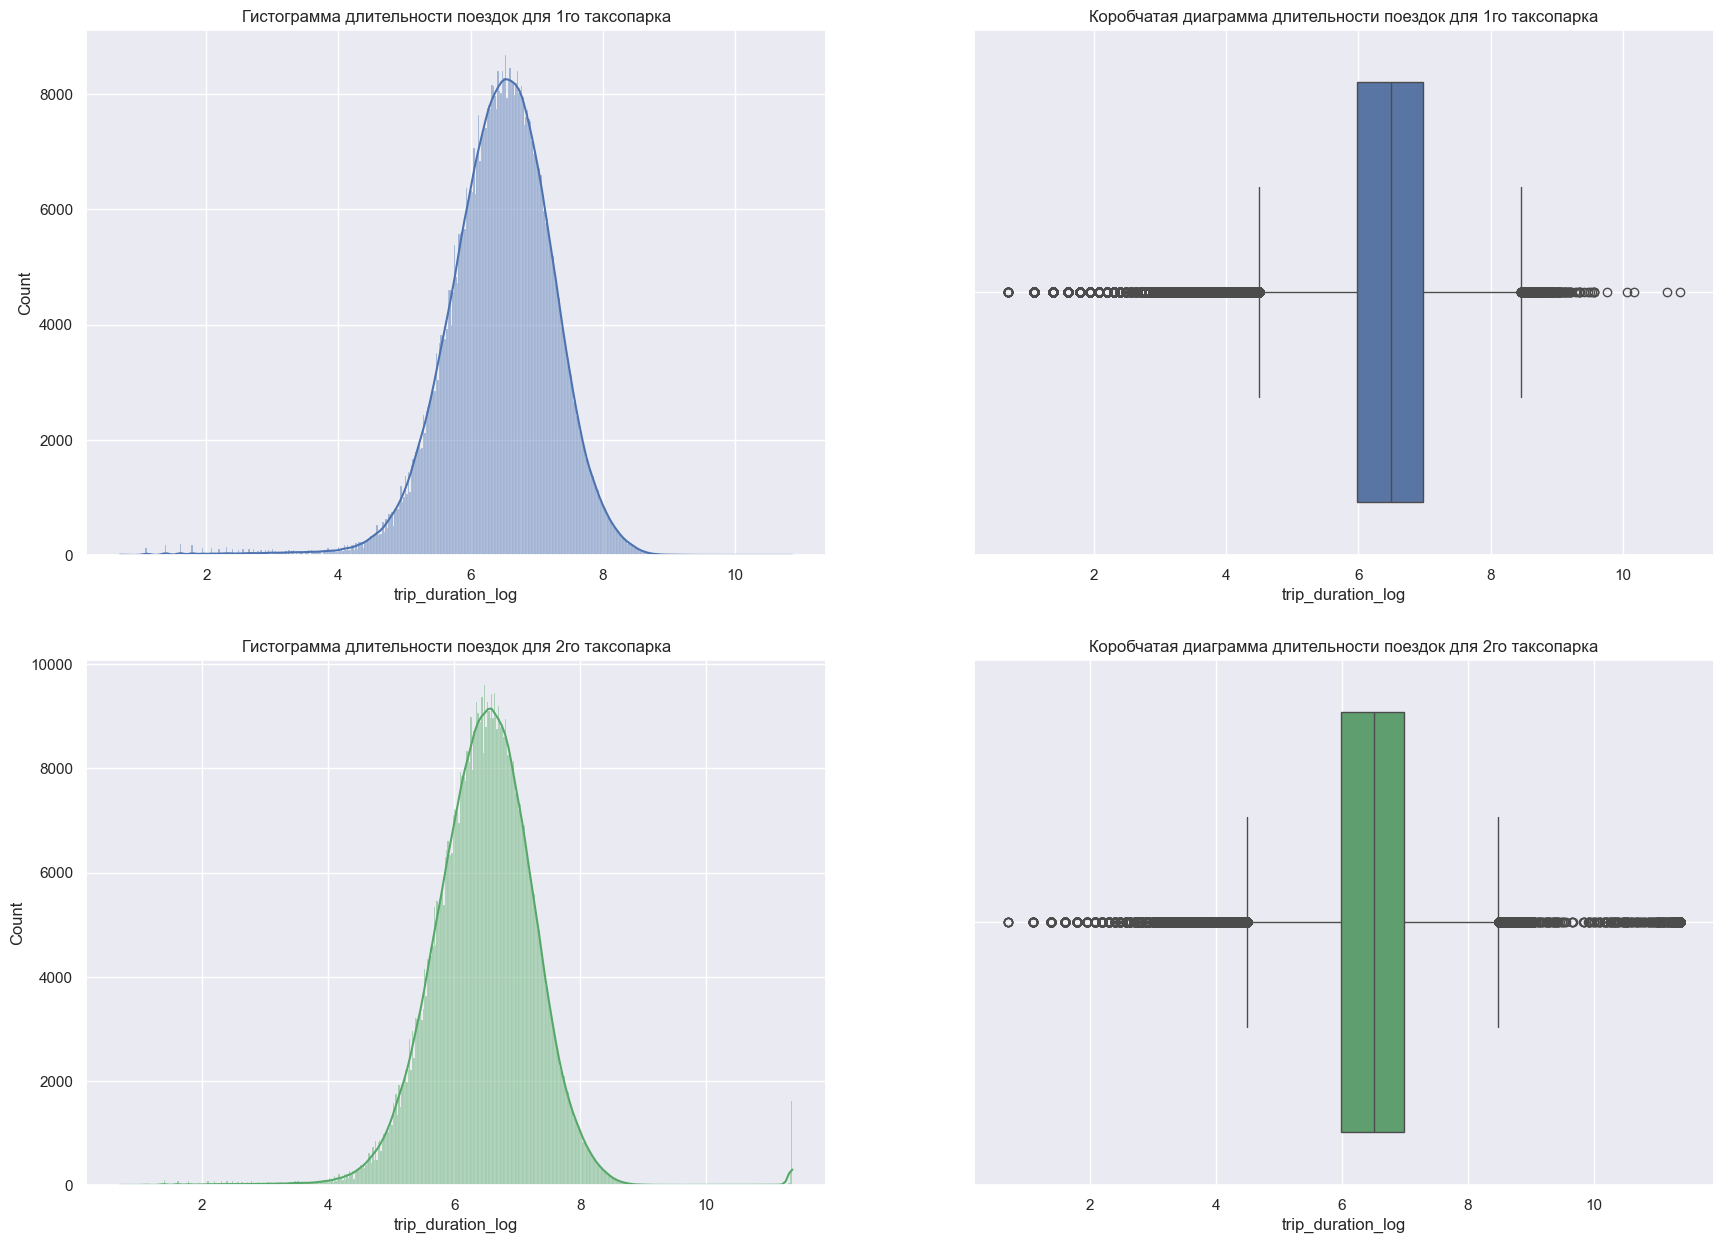

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(21, 15))

# Отфильтровываем данные для первого и второго таксопарков
vendor1 = data.query('vendor_id == 1')
vendor2 = data.query('vendor_id == 2')

# Визуализируем данные
sns.histplot(vendor1, x='trip_duration_log', ax=ax[0, 0], kde=True)
ax[0, 0].grid()
ax[0, 0].set_title('Гистограмма длительности поездок для 1го таксопарка')

sns.boxplot(vendor1, x='trip_duration_log', orient='h', ax=ax[0, 1])
ax[0, 1].set_title('Коробчатая диаграмма длительности поездок для 1го таксопарка')
ax[0, 1].grid()

# Второй таксопарк отобразим зеленым цветом
sns.histplot(vendor2, x='trip_duration_log', ax=ax[1, 0], color='g', kde=True)
ax[1, 0].grid()
ax[1, 0].set_title('Гистограмма длительности поездок для 2го таксопарка')

sns.boxplot(vendor2, x='trip_duration_log', orient='h', ax=ax[1, 1], color='g')
ax[1, 1].set_title('Коробчатая диаграмма длительности поездок для 2го таксопарка')
ax[1, 1].grid()


*Из графиков видно, что распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки.*

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

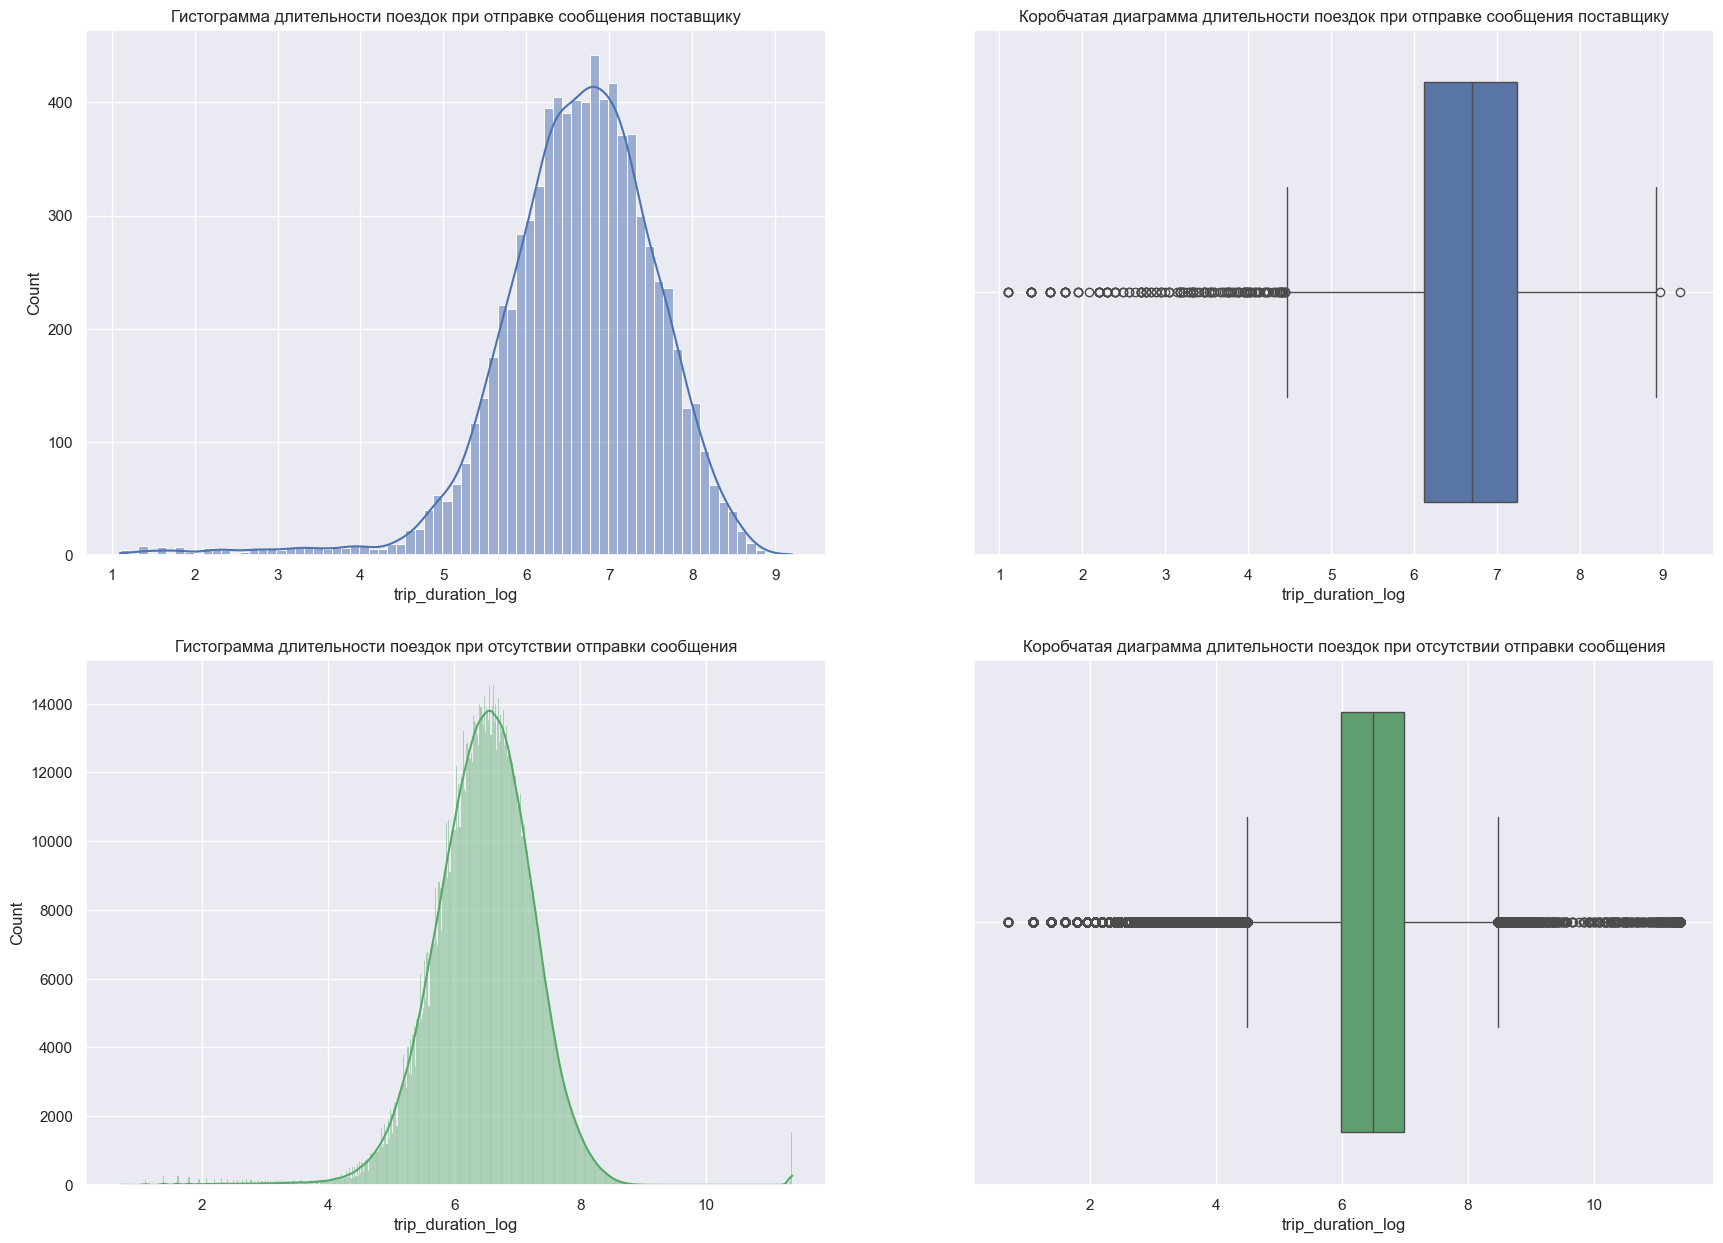

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(21, 15))

# Отфильтровываем данные для первого и второго таксопарков
flag_Y = data.query("store_and_fwd_flag == 'Y'")
flag_N = data.query("store_and_fwd_flag == 'N'")

# Визуализируем данные
sns.histplot(flag_Y, x='trip_duration_log', ax=ax[0, 0], kde=True)
ax[0, 0].grid()
ax[0, 0].set_title('Гистограмма длительности поездок при отправке сообщения поставщику')

sns.boxplot(flag_Y, x='trip_duration_log', orient='h', ax=ax[0, 1])
ax[0, 1].set_title('Коробчатая диаграмма длительности поездок при отправке сообщения поставщику')
ax[0, 1].grid()

# Второй таксопарк отобразим зеленым цветом
sns.histplot(flag_N, x='trip_duration_log', ax=ax[1, 0], color='g', kde=True)
ax[1, 0].grid()
ax[1, 0].set_title('Гистограмма длительности поездок при отсутствии отправки сообщения')

sns.boxplot(flag_N, x='trip_duration_log', orient='h', ax=ax[1, 1], color='g')
ax[1, 1].set_title('Коробчатая диаграмма длительности поездок при отсутствии отправки сообщения')
ax[1, 1].grid()

*Распределения в группах значительно отличаются, признак store_and_fwd_flag имеет значение при определении длительности поездки.  Если внимательно присмотреться к распределению длительности поездок в зависимости от признака store_and_fwd_flag, становится ясно, что наиболее длительные поездки принадлежат к группе N (не хранить и не пересылать поездку). Таким образом, флаг сохраняется только для кратковременных поездок, а для аномальных многочасовых — не сохраняется.*

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

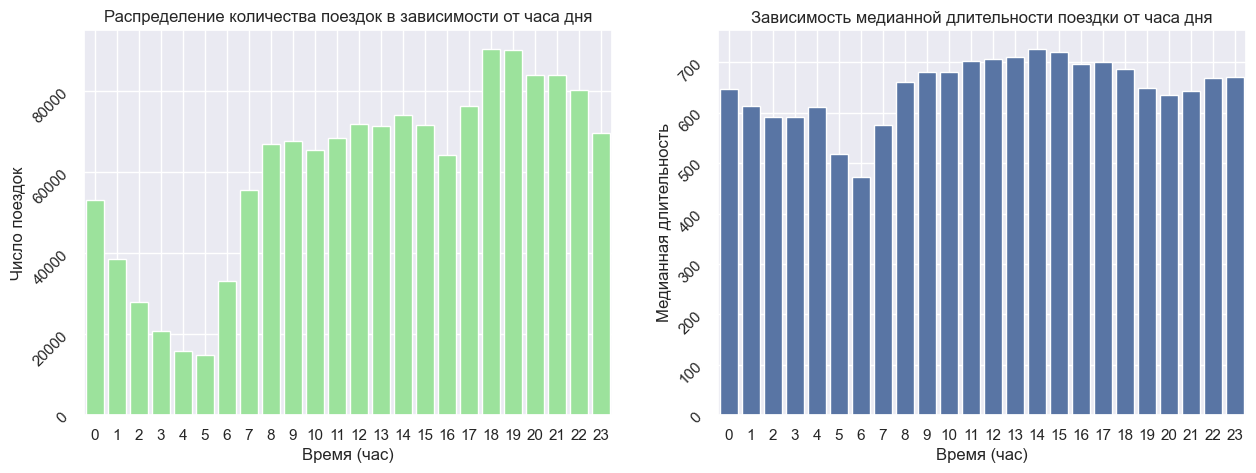

In [29]:
# Сгруппируем данные для удобства
grupped = data.groupby('pickup_hour')['trip_duration'].agg(['count', 'median'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Диаграма числа поездок
sns.barplot(grupped['count'], ax=ax[0], color='lightgreen')
ax[0].grid()
ax[0].set_title('Распределение количества поездок в зависимости от часа дня')
ax[0].set_xlabel('Время (час)')
ax[0].set_ylabel('Число поездок')
ax[0].yaxis.set_tick_params(rotation = 45)

# Диаграма медианной длительности поездки
sns.barplot(grupped['median'], ax=ax[1])
ax[1].set_ylabel('Медианная длительность')
ax[1].set_title('Зависимость медианной длительности поездки от часа дня')
ax[1].set_xlabel('Время (час)')
ax[1].yaxis.set_tick_params(rotation = 45)
ax[1].grid()


In [30]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')

*Такси реже всего заказывают с 00:00 по 5:00. Пик медианной длительности поездок наблюдается с 13:00 по 18:00.*

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


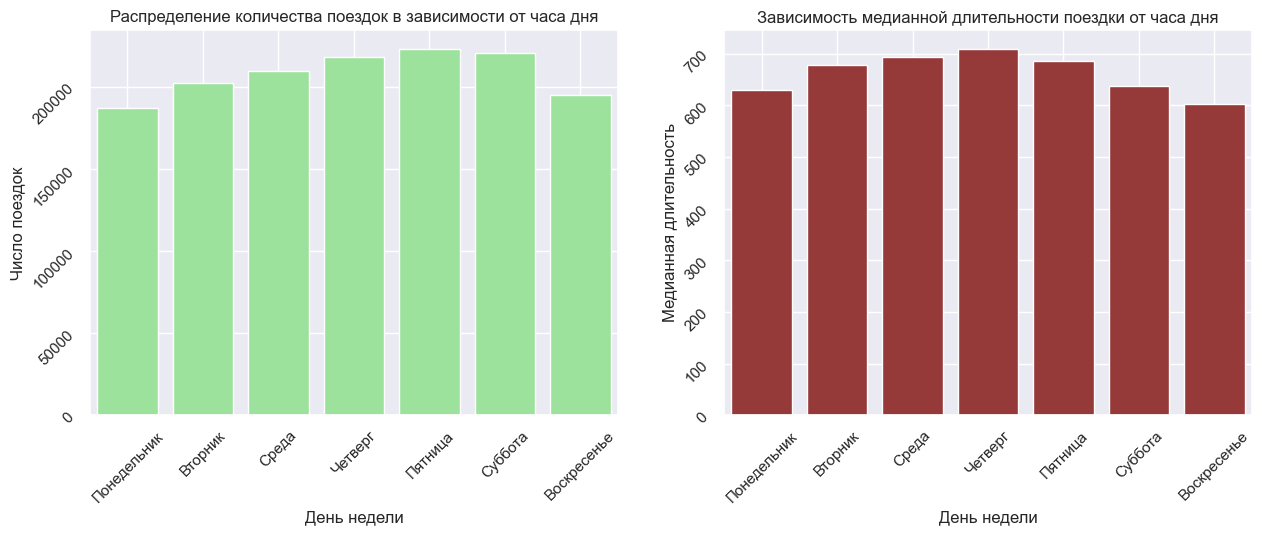

In [31]:
import matplotlib.ticker as mticker

# Сгруппируем данные для удобства
grupped_day = data.groupby('pickup_day_of_week')['trip_duration'].agg(['count', 'median'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Названия дней недели для меток оси X
days_labels = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

# Диаграма числа поездок
sns.barplot(grupped_day['count'], ax=ax[0], color='lightgreen')
ax[0].grid()
ax[0].set_title('Распределение количества поездок в зависимости от часа дня')
ax[0].xaxis.set_major_locator(mticker.FixedLocator(grupped_day.index))
ax[0].set_xlabel('День недели')
ax[0].set_ylabel('Число поездок')
ax[0].yaxis.set_tick_params(rotation = 45)
ax[0].set_xticklabels(days_labels, rotation=45)

# Диаграма медианной длительности поездки
sns.barplot(grupped_day['median'], ax=ax[1], color='brown')
ax[1].set_ylabel('Медианная длительность')
ax[1].set_title('Зависимость медианной длительности поездки от часа дня')
ax[1].xaxis.set_major_locator(mticker.FixedLocator(grupped_day.index))
ax[1].set_xlabel('День недели')
ax[1].yaxis.set_tick_params(rotation = 45)
ax[1].set_xticklabels(days_labels, rotation=45)
ax[1].grid()


### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

<Axes: xlabel='pickup_day_of_week', ylabel='pickup_hour'>

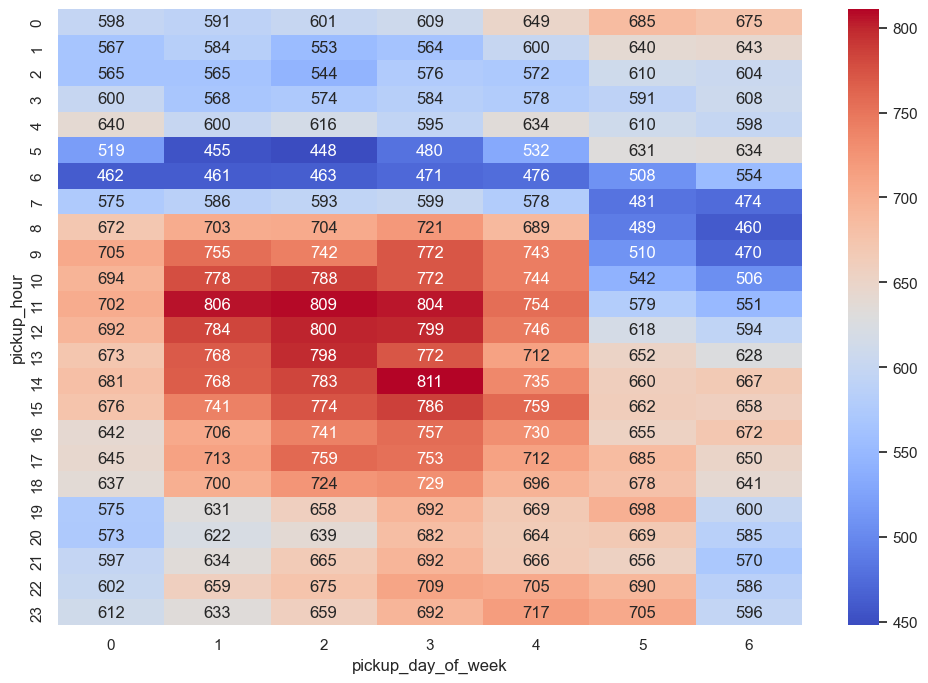

In [32]:
# Построим сводную таблицу
pivot = pd.pivot_table(
    data=data,
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc='median',
    values='trip_duration'
)

# Отобразим тепловую карту
plt.figure(figsize=(12,8))

sns.heatmap(data=pivot,
            cmap='coolwarm',
            annot=True,
            fmt='.0f')

- *Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов*
- *Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня*

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


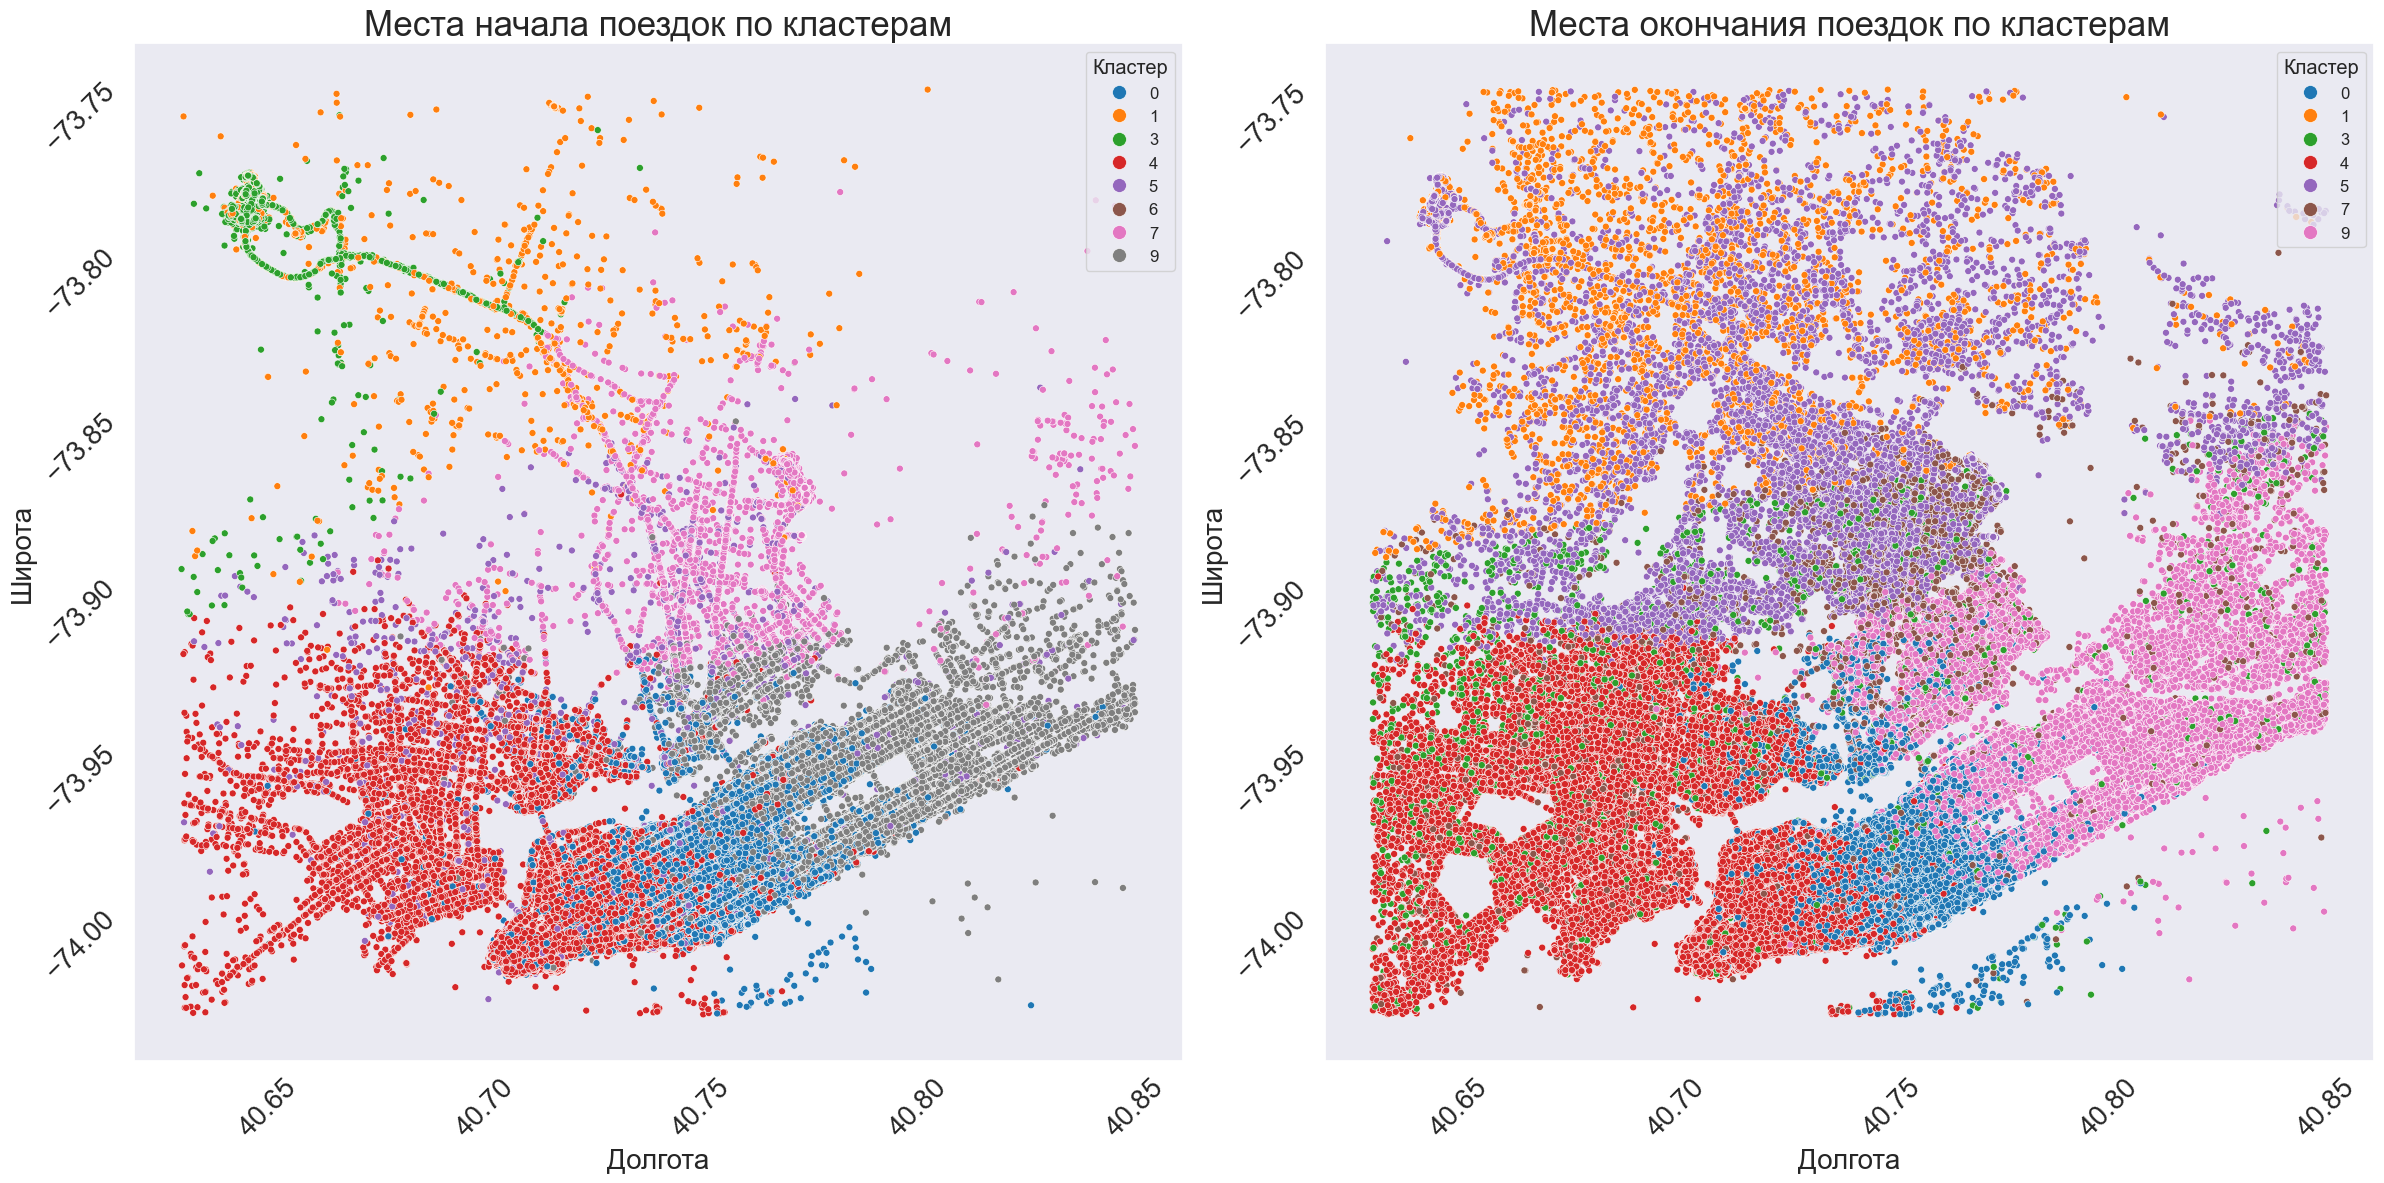

In [33]:
# Заданные границы
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Маски для выбора значений внутри заданных границ
pickup_mask = (
    data['pickup_latitude'].between(*city_lat_border)
    & data['pickup_longitude'].between(*city_long_border)
)
dropoff_mask = (
    data['dropoff_latitude'].between(*city_lat_border)
    & data['dropoff_longitude'].between(*city_long_border)
)

# Фильтрация данных с нужными столбцами
pickup_coords = data.loc[pickup_mask, ['pickup_latitude', 'pickup_longitude', 'geo_cluster']]
dropoff_coords = data.loc[dropoff_mask, ['dropoff_latitude', 'dropoff_longitude', 'geo_cluster']]

fig, ax = plt.subplots(1, 2, figsize=(24, 12))

# Диаграмма рассеяния для точек начала поездок
sns.scatterplot(
    data=pickup_coords,
    x='pickup_latitude',
    y='pickup_longitude',
    hue='geo_cluster',
    s=25,
    palette='tab10',
    ax=ax[0]
)

ax[0].legend(
    loc='upper right',
    title='Кластер',
    fontsize='medium',           # размер шрифта подписей
    title_fontsize='large',      # размер шрифта заголовка легенды
    markerscale=2                # масштаб точек в легенде (увеличивает размер маркеров)
)
ax[0].tick_params(axis='x', labelrotation=45, labelsize=20)
ax[0].tick_params(axis='y', labelrotation=45, labelsize=20)
ax[0].set_title('Места начала поездок по кластерам', fontsize=25)
ax[0].set_xlabel('Долгота', fontsize=20)
ax[0].set_ylabel('Широта', fontsize=20)

# Диаграмма рассеяния для точек окончания поездок
sns.scatterplot(
    data=dropoff_coords,
    x='dropoff_latitude',
    y='dropoff_longitude',
    hue='geo_cluster',
    s=25,
    palette='tab10',
    ax=ax[1]
)

ax[1].legend(
    loc='upper right',
    title='Кластер',
    fontsize='medium',           # размер шрифта подписей
    title_fontsize='large',      # размер шрифта заголовка легенды
    markerscale=2                # масштаб точек в легенде (увеличивает размер маркеров)
)
ax[1].tick_params(axis='x', labelrotation=45, labelsize=20)
ax[1].tick_params(axis='y', labelrotation=45, labelsize=20)
ax[1].set_title('Места окончания поездок по кластерам', fontsize=25)
ax[1].set_xlabel('Долгота', fontsize=20)
ax[1].set_ylabel('Широта', fontsize=20)

plt.tight_layout()



## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [34]:
print('Shape of data: {}'.format(data.shape))
print('Columns: {}'.format(data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [35]:
train_data = data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [36]:
# Удалим неиформативный признак id и dropoff_datetime, который содержит утечку данных
train_data.drop(['id', 'dropoff_datetime'], axis=1, inplace=True)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [37]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [38]:
# Кодирование признаков vendor_id и store_and_fwd_flag

train_data['vendor_id'] = train_data['vendor_id'] - 1
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map(
    lambda x: 0 if x == 'N' else 1
)

print(f'Среднее по закодированному столбцу vendor_id: '
      f'{train_data["vendor_id"].mean():.2f}')

print(f'Среднее по закодированному столбцу store_and_fwd_flag: '
      f'{train_data["store_and_fwd_flag"].mean():.3f}')


Среднее по закодированному столбцу vendor_id: 0.53
Среднее по закодированному столбцу store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [39]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# handle_unknown='ignore' - игнорируем неизвестные категории при трансформации
coder = preprocessing.OneHotEncoder(drop='first', handle_unknown='ignore')

data_onehot = coder.fit_transform(train_data[columns_to_change]).toarray()

# Получаем имена новых признаков после кодирования
column_names = coder.get_feature_names_out()

data_onehot = pd.DataFrame(data_onehot, columns=column_names)
print(f'Из трех признаков у нас получилось сгенерировать {data_onehot.shape[1]}')


Из трех признаков у нас получилось сгенерировать 18


Добавим полученную таблицу с закодированными признаками:

In [40]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [41]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [42]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [57]:
selector = feature_selection.SelectKBest(feature_selection.f_regression, k=25)

# Обучаем селектор на тренировочных данных
selector.fit(X_train, y_train_log)

# Получаем список названий выбранных признаков
best_features = list(selector.get_feature_names_out())

# Оставляем в тренировочной и валидационной выборках только отобранные признаки
X_train = X_train[best_features]
X_valid = X_valid[best_features]

print(X_train.columns)

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_hour', 'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'temperature',
       'pickup_day_of_week_1', 'pickup_day_of_week_2', 'pickup_day_of_week_3',
       'pickup_day_of_week_4', 'pickup_day_of_week_5', 'pickup_day_of_week_6',
       'geo_cluster_1', 'geo_cluster_3', 'geo_cluster_5', 'geo_cluster_7',
       'geo_cluster_9'],
      dtype='object')


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [44]:
scaler = preprocessing.MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

print(f'Cреднее арифметическое для первого предиктора {X_train_scaled[:,0].mean():.2f}')

Cреднее арифметическое для первого предиктора 0.53


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$ z_i=log(y_i+1),      

RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})} $$



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [45]:
lin_reg = linear_model.LinearRegression()

# Обучаем модель
lin_reg.fit(X_train_scaled, y_train_log)

# Делаем предсказания
y_train_pred = lin_reg.predict(X_train_scaled)
y_valid_pred = lin_reg.predict(X_valid_scaled)

print('На тренировочной выборке RMSLE получилась', 
      f'{np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)):.2f}')
print('На валидационной выборке RMSLE получилась',
      f'{np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)):.2f}')


На тренировочной выборке RMSLE получилась 0.54
На валидационной выборке RMSLE получилась 0.54


*RMSLE равен 0.54 и при этом тренировка и валидация совпадают по ошибке, это указывает на сбалансированную модель. Значения RMSLE ниже 0.1–0.2 считаются очень хорошими для большинства задач, а 0.5–0.6 — средними, когда данные сложно предсказать точно. В нашем случае можно считать 0.54 адекватной базовой метрикой, которую мы постаремся улучшить*

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [46]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly_reg = linear_model.LinearRegression()

# Сгенерируем полиноминальные признаки
X_train_poly = poly.fit_transform(X_train_scaled)
X_valid_poly = poly.fit_transform(X_valid_scaled)

# Обучаем модель
poly_reg.fit(X_train_poly, y_train_log)

# Делаем предсказания
y_train_pred = poly_reg.predict(X_train_poly)
y_valid_pred = poly_reg.predict(X_valid_poly)

print('На тренировочной выборке с полиномиальными признаками RMSLE получилась', 
      f'{np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)):.2f}')
print('На валидационной выборке с полиномиальными признаками RMSLE получилась',
      f'{np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)):.2f}')


На тренировочной выборке с полиномиальными признаками RMSLE получилась 0.47
На валидационной выборке с полиномиальными признаками RMSLE получилась 0.70


- *RMSLE на тренировочной выборке (0.47) ниже, чем ранее без полиномиальных признаков (0.54), что говорит о том, что полиномиальные признаки улучшили подгонку модели к обучающим данным. Чем ближе к 0 наша метрика, тем лучше полученная модель*

- *Однако RMSLE на валидационной выборке (0.70) заметно выше, чем на тренировочной, и также выше, чем без полиномиальных признаков (0.54). Это признак переобучения — модель слишком точно подстроилась под тренировочные данные, но хуже обобщается на новые.*

- Стоит рассмотреть методы регуляризации, изменение степени полинома, сбор дополнительных данных или упрощение модели, чтобы улучшить баланс между обучением и проверкой.

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [47]:
ridge_reg = linear_model.Ridge(
    alpha=1
)

# Обучаем модель
ridge_reg.fit(X_train_poly, y_train_log)

# Делаем предсказания
y_train_pred = ridge_reg.predict(X_train_poly)
y_valid_pred = ridge_reg.predict(X_valid_poly)

print('На тренировочной выборке с полиномиальными признаками и L2-регуляцией RMSLE получилась', 
      f'{np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)):.2f}')
print('На валидационной выборке с полиномиальными признаками и L2-регуляцией  RMSLE получилась',
      f'{np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)):.2f}')

На тренировочной выборке с полиномиальными признаками и L2-регуляцией RMSLE получилась 0.48
На валидационной выборке с полиномиальными признаками и L2-регуляцией  RMSLE получилась 0.48


*RMSLE на тренировочной и валидационной выборках одинаково равна 0.48, что указывает на хорошее обобщение модели. Модель с регуляризацией предотвращает переобучение, сохраняя стабильное качество на новых данных. Значение метрики ниже, чем без регуляризации, что говорит об улучшении производительности и баланса между подгонкой и обобщением.*

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [48]:
tree_model = tree.DecisionTreeRegressor()

# Обучаем модель
tree_model.fit(X_train_scaled, y_train_log)

# Делаем предсказание
y_train_pred = tree_model.predict(X_train_scaled)
y_valid_pred = tree_model.predict(X_valid_scaled)

print('На тренировочной выборке у модели дерева решений RMSLE получилась', 
      f'{np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)):.2f}')
print('На валидационной выборке у модели дерева решений RMSLE получилась',
      f'{np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)):.2f}')

На тренировочной выборке у модели дерева решений RMSLE получилась 0.00
На валидационной выборке у модели дерева решений RMSLE получилась 0.57


- *RMSLE на тренировочной выборке равна 0.00, что говорит о полном совпадении предсказаний с обучающими данными — признак сильного переобучения.*

- *RMSLE на валидационной выборке составляет 0.57, что значительно выше тренировочного значения и указывает на плохое обобщение модели.*

- *Модель слишком подстроилась под тренировочные данные и не справляется с новыми, поэтому требуется регуляризация, настройка параметров или использование более устойчивых моделей.*

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


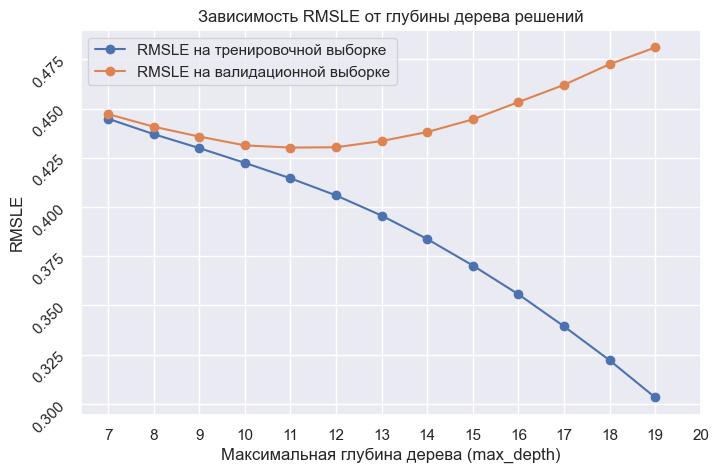

In [49]:
max_depths = range(7, 20)
rmsle_train = []
rmsle_valid = []

for depth in max_depths:
    tree_model = tree.DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_model.fit(X_train_scaled, y_train_log)
    
    y_train_pred = tree_model.predict(X_train_scaled)
    y_valid_pred = tree_model.predict(X_valid_scaled)
    
    rmsle_train.append(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)))
    rmsle_valid.append(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)))

# Построение графиков
plt.figure(figsize=(8, 5))
plt.plot(max_depths, rmsle_train, label='RMSLE на тренировочной выборке', marker='o')
plt.plot(max_depths, rmsle_valid, label='RMSLE на валидационной выборке', marker='o')
plt.xlabel('Максимальная глубина дерева (max_depth)')
plt.xticks(np.arange(7, 21, 1))
plt.ylabel('RMSLE')
plt.yticks(rotation=45)
plt.title('Зависимость RMSLE от глубины дерева решений')
plt.legend()
plt.grid();

Из графика распределения метрики RLMSE можно увидеть, что оптимальная глубина дерева будет равняться 12.

In [50]:
# Посчитаем метрики для оптимальной глубины дерева
tree_model = tree.DecisionTreeRegressor(max_depth=12, random_state=42)

# Обучаем модель
tree_model.fit(X_train_scaled, y_train_log)

# Делаем предсказание
y_train_pred = tree_model.predict(X_train_scaled)
y_valid_pred = tree_model.predict(X_valid_scaled)

print('На тренировочной выборке у модели дерева решений с оптимальной глубиной RMSLE получилась', 
      f'{np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)):.2f}')
print('На валидационной выборке у модели дерева решений с оптимальной глубиной RMSLE получилась',
      f'{np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)):.2f}')

На тренировочной выборке у модели дерева решений с оптимальной глубиной RMSLE получилась 0.41
На валидационной выборке у модели дерева решений с оптимальной глубиной RMSLE получилась 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [51]:
forest = ensemble.RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42
)

# Обучаем модель
forest.fit(X_train_scaled, y_train_log)

# Делаем предсказание
y_train_pred = forest.predict(X_train_scaled)
y_valid_pred = forest.predict(X_valid_scaled)

print('На тренировочной выборке у ансамбля случайного леса RMSLE получилась', 
      f'{np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)):.2f}')
print('На валидационной выборке у ансамбля случайного леса RMSLE получилась',
      f'{np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)):.2f}')

На тренировочной выборке у ансамбля случайного леса RMSLE получилась 0.40
На валидационной выборке у ансамбля случайного леса RMSLE получилась 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [52]:
boosting = ensemble.GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6, 
    min_samples_split=30,
    random_state=42
)

# Обучаем модель
boosting.fit(X_train_scaled, y_train_log)

# Делаем предсказание
y_train_pred = boosting.predict(X_train_scaled)
y_valid_pred = boosting.predict(X_valid_scaled)

print('На тренировочной выборке градиентного бустинга над деревьями решений RMSLE получилась', 
      f'{np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)):.2f}')
print('На валидационной выборке градиентного бустинга над деревьями решений RMSLE получилась',
      f'{np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)):.2f}')

На тренировочной выборке градиентного бустинга над деревьями решений RMSLE получилась 0.37
На валидационной выборке градиентного бустинга над деревьями решений RMSLE получилась 0.39


*Из всех рассмотренных моделей наивысшее качество прогнозирования по метрике RMSLE на валидационной выборке демонстрирует градиентный бустинг над деревьями решений — 0.39, что на 0.02 лучше, чем у случайного леса (0.41), и на 0.04 лучше, чем у одиночного дерева решений (0.43). Это указывает на более точную и устойчивую модель, способную лучше адаптироваться к сложностям задачи и ошибкам предыдущих прогнозов.*

*Случайный лес с RMSLE 0.41 на валидации является хорошим компромиссным решением, обладая высокой точностью, близкой к бустингу, но при этом обучаясь заметно быстрее, так как деревья строятся параллельно и независимо друг от друга. Это делает случайный лес предпочтительным вариантом, если требуется сохранить высокое качество, но при этом ограничено время или вычислительные ресурсы.*

*Дерево решений показывает средний результат (0.43), уступая ансамблям, но всё ещё оставаясь лучше простых регрессий. Оно обучается значительно быстрее, что позволяет быстро получить базовое понимание данных и структуру модели при минимальных затратах времени.*

*Простые линейные и полиномиальные модели регрессии уступают всем ансамблям и дереву решений: особенно полиномиальная регрессия без регуляризации с RMSLE 0.70, что указывает на переобучение и недостаточную устойчивость модели.*

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


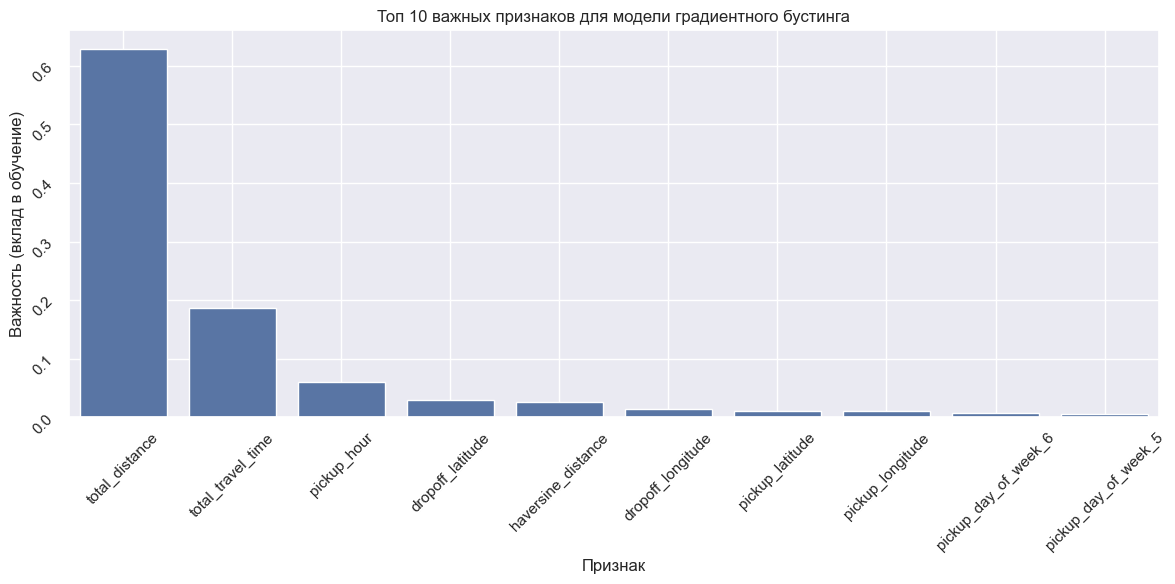

In [53]:
# Создаем DataFrame с признаками и их важностью
feat_imp_df = pd.DataFrame({
    'Признак': X_train.columns,  # Имена признаков
    'Важность (вклад в обучение)': boosting.feature_importances_  # Важность признаков из модели
})

# Сортируем признаки по убыванию важности
feat_imp_df = feat_imp_df.sort_values(by='Важность (вклад в обучение)', ascending=False)

# Оставляем только топ-10 признаков для визуализации
top10_feat_imp_df = feat_imp_df.head(10)

# Создаем график важности признаков (топ-10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Признак', y='Важность (вклад в обучение)', data=top10_feat_imp_df)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Топ 10 важных признаков для модели градиентного бустинга')
plt.tight_layout()
plt.grid()
plt.show()


*Самыми важными признаками оказались total_distance, total_travel_time и pickup_hour*

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$
Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [54]:
# Преобразование истинных и предсказанных значений из логарифмического масштаба обратно в исходный
y_valid_exp = np.exp(y_valid_pred) - 1
y_true_exp = np.exp(y_valid_log) - 1

# Расчет медианной абсолютной ошибки (Median Absolute Error, MeAE)
median_absolute_error = metrics.median_absolute_error(y_true_exp, y_valid_exp)

# Считаем ошибку в секундах
meae = round(median_absolute_error / 60, 1)

print(f'Медианная абсолютная ошибка для модели градиентого бустинга получилась {meae} минут')


Медианная абсолютная ошибка для модели градиентого бустинга получилась 1.8 минут


*Полученные результаты позволяют с уверенностью использовать модель градиентного бустинга для предсказания времени поездок такси в Нью-Йорке, обеспечивая среднюю ошибку прогноза около 1.8 минут, что соответствует приемлемому уровню точности для практических задач.*

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("data/test_data.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [71]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = coder.fit_transform(test_data[columns_to_change]).toarray()
column_names = coder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
y_test_predict = np.exp(boosting.predict(X_test_scaled))-1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

После чего модуль можно импортировать:

In [75]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [76]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [77]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:0.73991	valid-rmse:0.74193
[10]	train-rmse:0.49085	valid-rmse:0.49344
[20]	train-rmse:0.44063	valid-rmse:0.44348
[30]	train-rmse:0.42658	valid-rmse:0.42965
[40]	train-rmse:0.41842	valid-rmse:0.42166
[50]	train-rmse:0.41305	valid-rmse:0.41661
[60]	train-rmse:0.40974	valid-rmse:0.41359
[70]	train-rmse:0.40687	valid-rmse:0.41111
[80]	train-rmse:0.40461	valid-rmse:0.40911
[90]	train-rmse:0.40260	valid-rmse:0.40734
[100]	train-rmse:0.40063	valid-rmse:0.40564
[110]	train-rmse:0.39910	valid-rmse:0.40441
[120]	train-rmse:0.39799	valid-rmse:0.40350
[130]	train-rmse:0.39675	valid-rmse:0.40254
[140]	train-rmse:0.39580	valid-rmse:0.40186
[150]	train-rmse:0.39468	valid-rmse:0.40096
[160]	train-rmse:0.39385	valid-rmse:0.40039
[170]	train-rmse:0.39285	valid-rmse:0.39958
[180]	train-rmse:0.39187	valid-rmse:0.39885
[190]	train-rmse:0.39114	valid-rmse:0.39842
[200]	train-rmse:0.39047	valid-rmse:0.39805
[210]	train-rmse:0.38989	valid-rmse:0.39772
[220]	train-rmse:0.38930	valid-rmse:0.39746

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [78]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39502


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

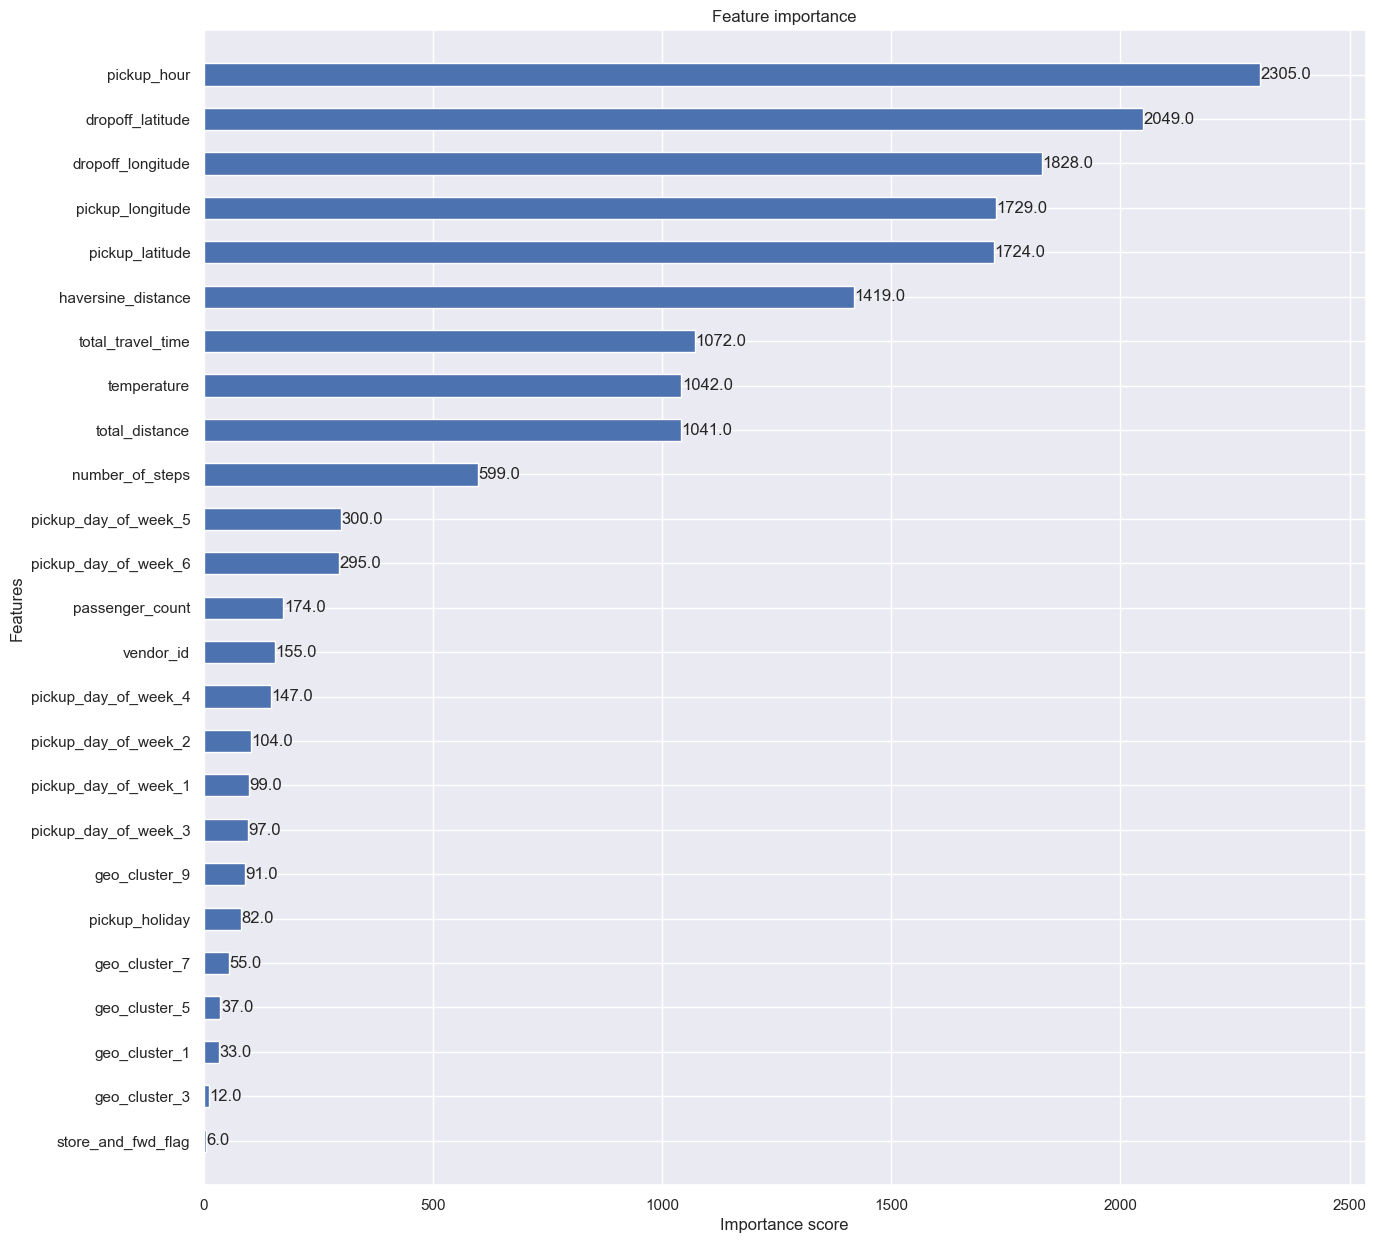

In [79]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)